<a href="https://colab.research.google.com/github/milowia/python_wagon/blob/main/ML_4_Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

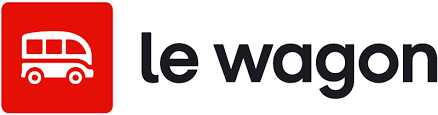

# Cross-validation

In this challenge, you will be introduced to a new concept: **cross-validation**.

Cross-validation is kind of similar to something you already know: **train-test split**.



Have a look at the diagram below. The upper part represents the **train-test split** which you already know. \
The lower part represents **cross-validation**.

![](https://wagon-public-datasets.s3.amazonaws.com/data-analytics/machine-learning/cross-validation.png)

As you can see, in the classic train-test split, we split the data in two sets: **train and test**.

In cross-validation, we further split the training set into *k* folds! In this case, *k* = 5. \
That means that 5 sub-models will be trained, and for each sub-model, 4 folds of data will be used for training and 1 fold will be used for testing. We will then compute the average test score of our sub-models, which is called a **cross-validated score**.


This is a very robust way to test the performance of our model, as we can make sure that each part of our data will be used at some point for testing.


## Import the data


We will be reusing the NBA dataset from the Regression challenge. 🏀


The dataset is available at this link: [https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/NBA.csv)


Load it into a `df`variable.


In [ ]:
#your code here

## Define X and y

Same as in the previous challenges, we need to define the features and the target.

Create **X** and **y**.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Le Wagon - DA/Feb 08 - Machine Learning/NBA.csv')
X = df.drop(columns=['win_rating', 'season'])
y = df['win_rating']

## Train-test split



You know the drill by now, use Sklearn's `train_test_split` function to split your data into `X_train`, `X_test`, `y_train` and `y_test`.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head(2)

,poss,mp,do_ratio,pacing
1161,1489,668,0.904039,1.351814
2355,3293,1535,-0.909506,0.136294


## Scaling the features

Just like in the previous challenges we need to scale our numerical features.

Import and instantiate a scaler of your choice from the **Sklearn** library. \
Then, scale your features and save the results in two new variables named `X_train_scaled`and `X_test_scaled`.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_sacled = scaler.transform(X_test)

## Cross-validation

Now the fun begins! 🔥

Before cross-validating, we need to instantiate a model. \
Instantiate a **Linear Regression** model **without fitting it**.


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### 5-fold cross-validation


Time to cross-validate! \
You will need to import the `cross_val_score` method.

Run a **5-fold** cross-validation on your Linear Regression model. Store the results in a `score`variable.



<details>
    <summary>Help 😵‍💫</summary>
    
Here's the framework:

`score = cross_val_score(estimator=your_model, X=your_features, y= your_target, cv = number_of_folds)`

</details>


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X_train_scaled, y_train, cv=5)
score

array([0.6359616 , 0.6245319 , 0.57645348, 0.65074232, 0.6551249 ])

What does it look like? \
If you ran the code properly, `score`should contain 5 individual R<sup>2</sup> values!



---

What's the mean score? Store it in a `score_five`variable.


In [ ]:
score_five = score
score_five.mean()

0.6303250439159432

### 10-fold cross-validation


Let's repeat the process, but this time with a **10-fold** cross-validation.

What does it imply in terms of sub-models ?



> **Your answer here (Double Click)**

Run the cross-validation, and store the results in a `score` variable.


In [ ]:
score = cross_val_score(model, X_train_scaled, y_train, cv=10)
score

array([0.60380866, 0.67162609, 0.63186552, 0.62323783, 0.56276355,
       0.59546061, 0.62330087, 0.67860907, 0.67391071, 0.63866753])

`score`should now contain 10 individual R<sup>2</sup> values!


---

What's the mean score? Store it in a `score_ten`variable.

In [ ]:
score_ten = score
score_ten.mean()

0.6303250439159432

## Evaluate on the test set



**IMPORTANT NOTE**

Cross-validation **does not** fit the model! We will have to train our Linear Regression model before going any further.

Fit the model on your train set.



In [ ]:
model.fit(X_train_scaled, y_train)


LinearRegression()

Now score your fitted model on your test set.



In [ ]:
model.score(X_test_sacled, y_test)


0.6446947826843756

Compare the value to `score_five`and `score_ten`. The results should be in the same range!




## Conclusion

Cross-validation is a robust technique used to assess the performance of Machine Learning models. \
By partitioning the dataset into multiple sub-sets, or **folds**, and iteratively training and testing on these different combinations, cross-validation provides a more comprehensive understanding of a model's ability to generalize to new data.

Congratulations for your first day of Machine Learning! 🎉
